In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import sklearn

In [5]:
df = sns.load_dataset('titanic')

In [9]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [10]:
len(df)

891

In [8]:
df.dropna()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
10,1,3,female,4.0,1,1,16.7000,S,Third,child,False,G,Southampton,yes,False
11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
871,1,1,female,47.0,1,1,52.5542,S,First,woman,False,D,Southampton,yes,False
872,0,1,male,33.0,0,0,5.0000,S,First,man,True,B,Southampton,no,True
879,1,1,female,56.0,0,1,83.1583,C,First,woman,False,C,Cherbourg,yes,False
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True


In [13]:
df.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [14]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
df['age'].fillna(df['age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: age, Length: 891, dtype: float64

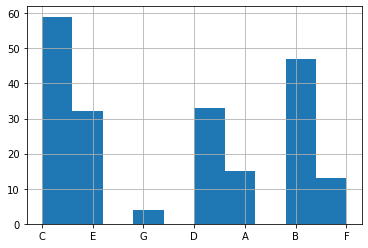

In [18]:
df['deck'].hist()

In [19]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


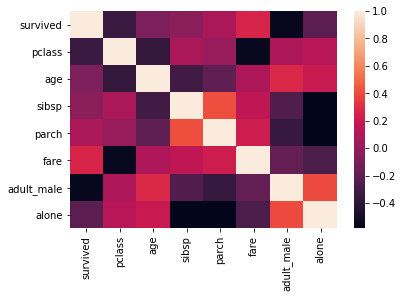

In [21]:
sns.heatmap(df.corr())

In [22]:
df[['age', 'pclass']]

,age,pclass
0,22.0,3
1,38.0,1
2,26.0,3
3,35.0,1
4,35.0,3
...,...,...
886,27.0,2
887,19.0,1
888,NaN,3
889,26.0,1


In [24]:
df.groupby('pclass').mean()['age']

pclass
1    38.233441
2    29.877630
3    25.140620
Name: age, dtype: float64

In [36]:
df.groupby('pclass').transform('mean')['age']

0      25.140620
1      38.233441
2      25.140620
3      38.233441
4      25.140620
         ...    
886    29.877630
887    38.233441
888    25.140620
889    38.233441
890    25.140620
Name: age, Length: 891, dtype: float64

In [37]:
df['age'].fillna(df.groupby('pclass').transform('mean')['age'])

0      22.00000
1      38.00000
2      26.00000
3      35.00000
4      35.00000
         ...   
886    27.00000
887    19.00000
888    25.14062
889    26.00000
890    32.00000
Name: age, Length: 891, dtype: float64

In [29]:
df['deck'].ffill()

0      NaN
1        C
2        C
3        C
4        C
      ... 
886      C
887      B
888      B
889      C
890      C
Name: deck, Length: 891, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [32]:
df['deck'].bfill().ffill()

0      C
1      C
2      C
3      C
4      E
      ..
886    B
887    B
888    C
889    C
890    C
Name: deck, Length: 891, dtype: category
Categories (7, object): [A, B, C, D, E, F, G]

In [38]:
5

5

In [39]:
x = 5

In [40]:
from sklearn.impute import SimpleImputer

In [43]:
imputer = SimpleImputer(strategy='mean')

In [44]:
df_only_num = df.select_dtypes('number')
df_only_num

,survived,pclass,age,sibsp,parch,fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [46]:
imputer.fit(df_only_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [49]:
pd.DataFrame(imputer.transform(df_only_num), columns=df_only_num.columns)

,survived,pclass,age,sibsp,parch,fare
0,0.0,3.0,22.000000,1.0,0.0,7.2500
1,1.0,1.0,38.000000,1.0,0.0,71.2833
2,1.0,3.0,26.000000,0.0,0.0,7.9250
3,1.0,1.0,35.000000,1.0,0.0,53.1000
4,0.0,3.0,35.000000,0.0,0.0,8.0500
...,...,...,...,...,...,...
886,0.0,2.0,27.000000,0.0,0.0,13.0000
887,1.0,1.0,19.000000,0.0,0.0,30.0000
888,0.0,3.0,29.699118,1.0,2.0,23.4500
889,1.0,1.0,26.000000,0.0,0.0,30.0000
